In [1]:
from utils.helpers import *

import ipywidgets as widgets
from ipywidgets import interact, interact_manual, fixed

import warnings
warnings.filterwarnings('ignore')

# Bayesian Modelling of Covid-19
---

Here we consider two simple models for the growth of the number of cases in various countries: exponential vs sigmoidal. 

### Exponential

An exponential model grows like:

$\alpha e^{\beta  t}$ 

and is unbounded. As t, time, increases, the number of cases grows even faster. This is a crude approximation to what happens during an outbreak, but is fairly accurate early on, especially if no meaures are implemented to slow down the contagion. This exponential turn on of a virus is what we are hoping to slow down by social distancing, hygiene measures, and other efforts. 

### Sigmoid

A sigmoid, or plateauing model, looks exponential initially before leveling off. The model looks roughly like:

$\frac{1}{1+ e^{-\beta t}}$

This is a slightly more accurate depiction of what may happen during an outbreak: there are only so many people who can become infected before eventually you reach (in theory) the entire population. 


### Comparison

The exponential curve continues to increase with no slowdown, while a sigmoidal curve will eventually plateau. By comparing these two simple models we can see if countries are mitigating the effect of Covid-19 within their borders. 


To look at different models, simply:

1. Choose a country 
2. Choose a number of days to forecast (default of 7)
3. Click `Run Interact`


Note that for some models with very few data points, the uncertainties on the curves are going to be massive! We need more time (and data) for these curves to settle in. 

In [2]:
country_list = ['Italy', 'Germany', 'China', 'Spain', 'Canada', 'US',
                    'Canada British Columbia', 'Canada Alberta', 'Canada Ontario',
                    'China Hong Kong', 'Korea South', 'Singapore']
country_list.sort()

country_widget= widgets.Dropdown(
    options=country_list,
    value='Italy',
    description='Country:',
    disabled=False,
)

num_days_widget = widgets.IntText(
    value=7,
    step=1,
    description='Number of Future Days:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

ymax_widget = widgets.IntText(
    value=-1,
    description='Y Max:',
    disabled=False
)

out = interact_manual(plot_country, country=country_widget, num_days=num_days_widget, ymax = ymax_widget)
#plot_country('Italy')

interactive(children=(Dropdown(description='Country:', index=7, options=('Canada', 'Canada Alberta', 'Canada B…

## SIR Model
---

Although a sigmoidal model will do a relatively good job of approximating the number of cases during an outbreak, we can still do better. One thing the sigmoid model does not take into account is the fact that people can recover, becoming resistant to the virus. As more people become resistant, it becomes more unlikely for a sick (infected) person to interact with and successfully infect a healthy person.

To take into account (S)usceptible, (I)nfected, and (R)esistant members of the population, we can look at a SIR model. 

The basic setup of a SIR model is as follows:

$ \frac{dS}{dt} = -\beta I(t)S(t) $

$ \frac{dI}{dt} = +\beta I(t)S(t) - \gamma I(t) $

$ \frac{dR}{dt} = \gamma I(t) $

$ S + I + R = 1$

Where we have normalized to the population of interest.

Essentially: infected people will recover over time with probability $\gamma$, while they will infect susceptible people over time with probability $\beta$. A parameter of interest is the combined ratio:

$ R_0 = \frac{\beta}{\gamma} $ 

This tells us roughly how many new people may get infected by a single person. $R_0 > 1$ implies an epidemic is taking place.

### Flatten the Curve!!!

So what can we do about all this? We can flatten that curve! We can't really change how likely we are to recover if we get sick ($\gamma$). But if society as a whole can reduce the probability of getting sick in the first place ($\beta$), then we can reduce the overall stress on hospitals, etc by reducing the total number of new cases on any given day. Too many all at once will overload the system, leading to worse care for those who need it.  

We can do this mathematically by adding a new parameter, $\delta$, that allows us to have $\beta$ decrease over time. For example, if everyone starts to practice social distancing, $\delta$ will increase. If those who can work from home do, $\delta$ will increase. If kids stay home from school, $\delta$ will increase. You get the idea!

Let's check this out ... increase $\delta$ and watch that curve flatten!

In [3]:

    
delta_widget = widgets.FloatSlider(
    value=0.0,
    min=0,
    max=0.02,
    step=0.005,
    description='Delta: ',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=False,
    readout_format='.1f',
)

out = interact(sir_plot_static, R0=fixed(10), gamma=fixed(1/30), delta=delta_widget)

interactive(children=(FloatSlider(value=0.0, description='Delta: ', max=0.02, readout=False, readout_format='.…

### SIR In The Real World
---

So what does this look like in the real world? We can use the same Bayesian techniques to estimate best fits for model parameters.

Note that due to the complex nature of the model, this will take a little longer to load...


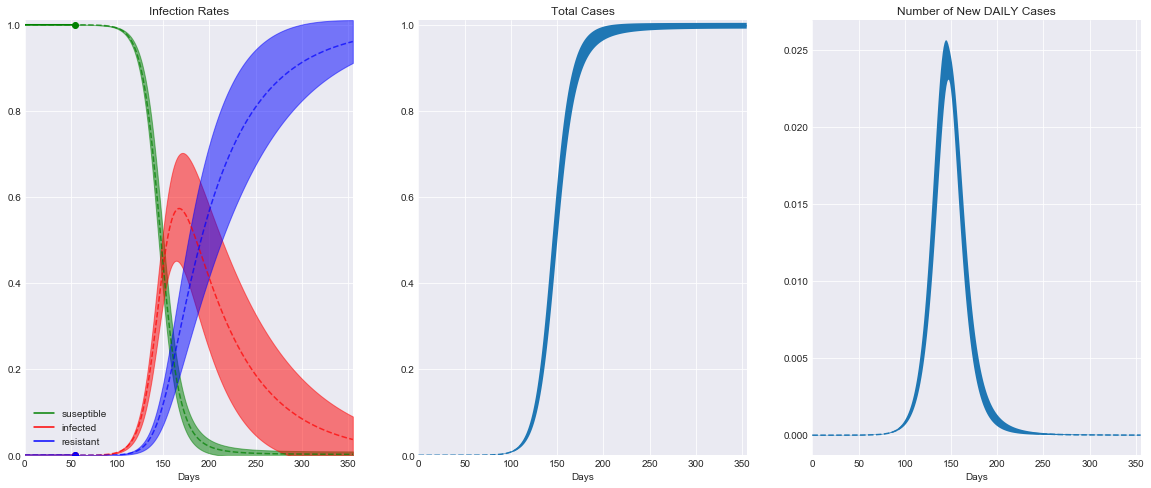

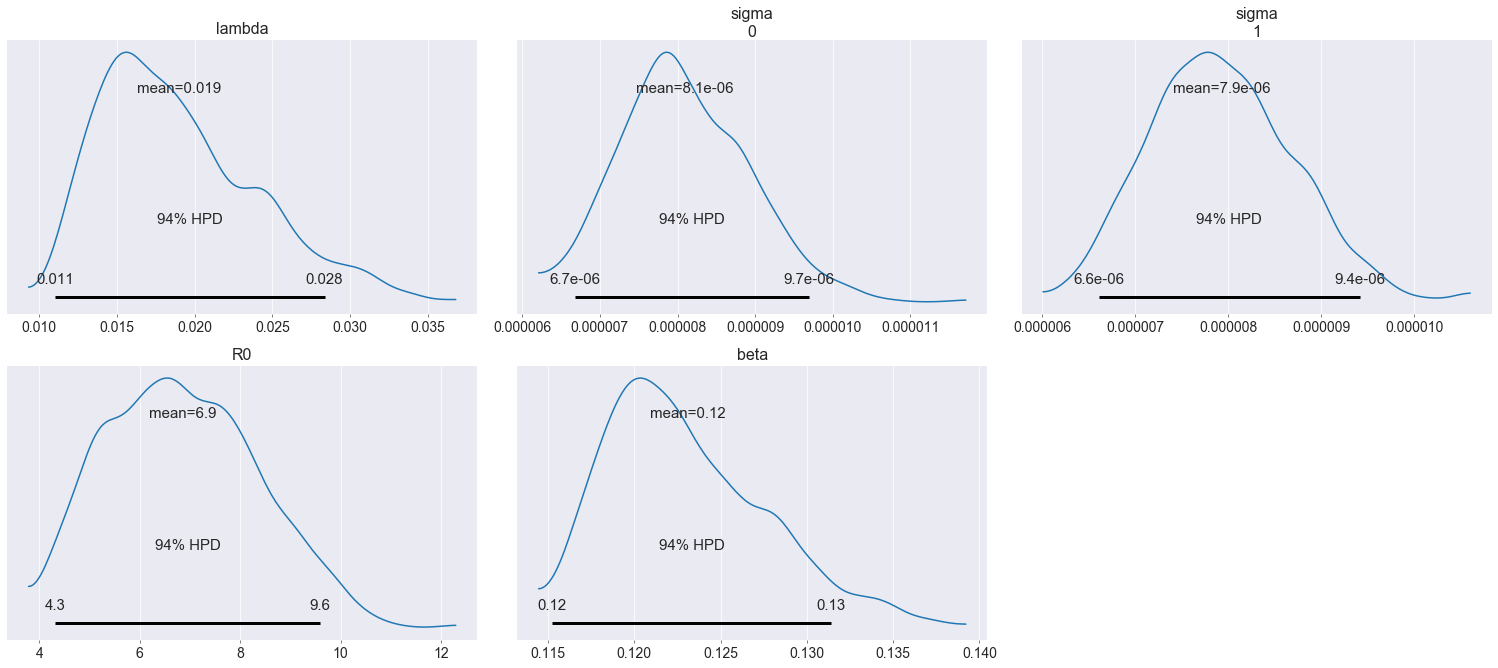

In [4]:
sir_bayes_plot('Canada British Columbia', 300)